In [1]:
#Import python libraries
#Data can be fount at: https://www.kaggle.com/datasets/l3llff/flowers

import keras
import datetime
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os
from os import listdir
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
#Display number of images for every flower type

flowercount=[]
names=[]
oslist=os.listdir(os.getcwd())

for folder in oslist:
    j=0
    if os.path.isdir(folder) and os.listdir(folder)[0].endswith(".jpg"):
            
            for flower in os.listdir(folder):
                j=j+1
            names.append(folder)
            flowercount.append(j)


fl=pd.DataFrame(names)
fl.columns=['Flower']
fl['count']=flowercount
fl

[737, 873, 1000, 978, 1022, 923, 980, 1047, 970, 1052, 1054, 1048, 999, 1027, 1048, 982]
['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'dandelion', 'iris', 'magnolia', 'rose', 'sunflower', 'tulip', 'water_lily']


,Flower,count
0,astilbe,737
1,bellflower,873
2,black_eyed_susan,1000
3,calendula,978
4,california_poppy,1022
5,carnation,923
6,common_daisy,980
7,coreopsis,1047
8,daffodil,970
9,dandelion,1052


In [6]:
#Import images from file

        
flower_names=[]
flower_count=15
flower_num=100
images=np.empty([flower_count,flower_num,256,256,3])    
i=0
for folder in oslist:
    
    j=0
    if i<flower_count and os.path.isdir(folder) and os.listdir(folder)[0].endswith(".jpg"):
        
        flower_names.append(folder)
        
        for flower in os.listdir(folder):
            
            if j<flower_num:
                   
                images[i,j] = plt.imread(folder+"/"+flower)
                j=j+1
            
        i=i+1
        
print(images.shape)       

(15, 100, 256, 256, 3)


In [7]:
#Scale jpg images into view format
images=images/255


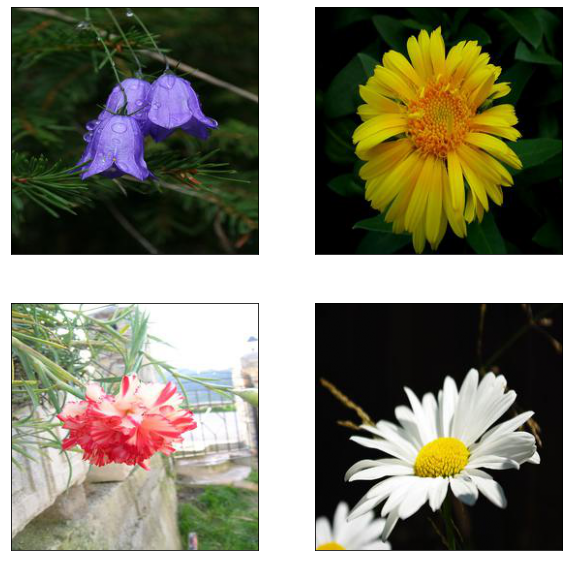

In [8]:

fig, ax = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(2):
    for j in range(2):
         ax[i,j].set_xticks([])
         ax[i,j].set_yticks([])
   
ax[0,0].imshow(images[1,5])
ax[0,1].imshow(images[3,5])
ax[1,0].imshow(images[5,5])
ax[1,1].imshow(images[6,5])

In [15]:
#print('Flower names: ',flower_names)
y=np.arange(flower_count*flower_num)
y2=np.floor(y/flower_num)
y3 = y2.reshape((flower_count, flower_num))
flower_names=np.array(flower_names)



In [16]:

first_list=[1,3,5,6]
second_list=[7,9,10,13]

y_first=y3[first_list]
x_first=images[first_list]

x_second=images[second_list]
y_second=y3[second_list]

x_first2=x_first.reshape(y_first.size,256,256,3)
y_first2=y_first.reshape(y_first.size)

x_second2=x_second.reshape(y_second.size,256,256,3)
y_second2=y_second.reshape(y_second.size)

print(x_second2.shape,y_first2.shape)

(400, 256, 256, 3) (400,)


In [57]:
print('First List: ',flower_names[first_list])

First List:  ['bellflower' 'calendula' 'carnation' 'common_daisy']


In [18]:
#Split data into stratified train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_first2, y_first2, test_size=0.3, random_state = 10, stratify=y_first2)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_second2, y_second2, test_size=0.3, random_state = 10, stratify=y_second2)


In [19]:
print(x_train.shape,y_train.shape)
print(x_train2.shape,y_train2.shape)
print(np.unique(y_train))
print(y_train.dtype)


(280, 256, 256, 3) (280,)
(280, 256, 256, 3) (280,)
[1. 3. 5. 6.]
float64


In [20]:
num_classes = 4

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train2 = keras.utils.to_categorical(y_train2)
y_test2 = keras.utils.to_categorical(y_test2)

In [21]:

y_test=y_test[:, first_list]
y_train=y_train[:, first_list]
y_test2=y_test2[:, second_list]
y_train2=y_train2[:, second_list]


In [22]:

print(y_test)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1.

In [23]:
#Create CNN model

model = Sequential()

model.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (5, 5), strides = (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        25632     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                        

In [25]:
filepath='model_chkpnt'
model_checkpoint = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [26]:
batch_size = 32

#RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=.00001)

#Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Fit model
model.fit(x_train, y_train, batch_size=batch_size, epochs=15, validation_data=(x_test, y_test), callbacks= model_checkpoint, shuffle=True)

Epoch 1/15
9/9 [==============================] - 25s 2s/step - loss: 2.7572 - accuracy: 0.3357 - val_loss: 1.0135 - val_accuracy: 0.5250
Epoch 2/15
9/9 [==============================] - 9s 1s/step - loss: 0.9963 - accuracy: 0.5643 - val_loss: 0.9050 - val_accuracy: 0.6417
Epoch 3/15
9/9 [==============================] - 9s 1s/step - loss: 0.9024 - accuracy: 0.6464 - val_loss: 0.7559 - val_accuracy: 0.6917
Epoch 4/15
9/9 [==============================] - 8s 889ms/step - loss: 0.6578 - accuracy: 0.7464 - val_loss: 0.7199 - val_accuracy: 0.7000
Epoch 5/15
9/9 [==============================] - 7s 769ms/step - loss: 0.6008 - accuracy: 0.7571 - val_loss: 0.8029 - val_accuracy: 0.7000
Epoch 6/15
9/9 [==============================] - 8s 947ms/step - loss: 0.5017 - accuracy: 0.8607 - val_loss: 0.7431 - val_accuracy: 0.6667
Epoch 7/15
9/9 [==============================] - 8s 936ms/step - loss: 0.2983 - accuracy: 0.9357 - val_loss: 0.8423 - val_accuracy: 0.6667
Epoch 8/15
9/9 [============

In [29]:
loss=[]
accur=[]
model.load_weights(filepath)
score = model.evaluate(x_test, y_test, verbose=0)
loss.append(score[0])
accur.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7597811222076416
Test accuracy: 0.800000011920929


In [31]:
#Create second model
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), strides=(2,2), padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(4, 4)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 activation_8 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 activation_9 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                      

In [33]:
#Adam optimizer
opt2= keras.optimizers.Adam(learning_rate=.001)

#Compile model
model2.compile(loss='categorical_crossentropy',optimizer=opt2, metrics=['accuracy'])


In [34]:
model2.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test), callbacks= model_checkpoint, shuffle=True)

Epoch 1/10
9/9 [==============================] - 12s 1s/step - loss: 2.3525 - accuracy: 0.3286 - val_loss: 1.0374 - val_accuracy: 0.6333
Epoch 2/10
9/9 [==============================] - 9s 1s/step - loss: 0.9372 - accuracy: 0.5964 - val_loss: 0.8084 - val_accuracy: 0.6833
Epoch 3/10
9/9 [==============================] - 7s 818ms/step - loss: 0.7369 - accuracy: 0.7143 - val_loss: 0.6912 - val_accuracy: 0.7250
Epoch 4/10
9/9 [==============================] - 7s 808ms/step - loss: 0.5969 - accuracy: 0.8143 - val_loss: 0.5826 - val_accuracy: 0.8000
Epoch 5/10
9/9 [==============================] - 7s 816ms/step - loss: 0.4244 - accuracy: 0.8500 - val_loss: 0.5405 - val_accuracy: 0.8000
Epoch 6/10
9/9 [==============================] - 8s 902ms/step - loss: 0.2749 - accuracy: 0.8929 - val_loss: 0.6512 - val_accuracy: 0.8250
Epoch 7/10
9/9 [==============================] - 8s 897ms/step - loss: 0.1994 - accuracy: 0.9536 - val_loss: 0.6075 - val_accuracy: 0.7500
Epoch 8/10
9/9 [=========

In [35]:
model2.load_weights(filepath)
score = model2.evaluate(x_test, y_test, verbose=0)
loss.append(score[0])
accur.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6512368321418762
Test accuracy: 0.824999988079071


In [45]:
#Create third model
model3 = Sequential()

model3.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3), strides = (1,1)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (5, 5), strides=(2,2), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 activation_24 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 activation_25 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 63, 63, 32)        0         
                                                      

In [46]:
filepath='model_chkpnt4'
model_checkpoint = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [47]:
#Compile and Fit model

opt3 = keras.optimizers.RMSprop(learning_rate=0.001, decay=.0001)

model3.compile(loss='categorical_crossentropy',optimizer=opt3,metrics=['accuracy'])

model3.fit(x_train, y_train, batch_size=batch_size, epochs=15, validation_data=(x_test, y_test), callbacks= model_checkpoint, shuffle=True)

Epoch 1/15
9/9 [==============================] - 18s 2s/step - loss: 2.5721 - accuracy: 0.2750 - val_loss: 1.3049 - val_accuracy: 0.5417
Epoch 2/15
9/9 [==============================] - 13s 1s/step - loss: 1.3392 - accuracy: 0.3500 - val_loss: 1.3796 - val_accuracy: 0.2500
Epoch 3/15
9/9 [==============================] - 13s 1s/step - loss: 1.2090 - accuracy: 0.4536 - val_loss: 1.0713 - val_accuracy: 0.4833
Epoch 4/15
9/9 [==============================] - 16s 2s/step - loss: 1.1384 - accuracy: 0.5286 - val_loss: 0.8521 - val_accuracy: 0.7667
Epoch 5/15
9/9 [==============================] - 14s 2s/step - loss: 0.9568 - accuracy: 0.6214 - val_loss: 0.9308 - val_accuracy: 0.5417
Epoch 6/15
9/9 [==============================] - 14s 2s/step - loss: 0.8288 - accuracy: 0.6500 - val_loss: 0.8861 - val_accuracy: 0.6500
Epoch 7/15
9/9 [==============================] - 14s 2s/step - loss: 1.0953 - accuracy: 0.6000 - val_loss: 0.8406 - val_accuracy: 0.7417
Epoch 8/15
9/9 [==================

In [48]:
print(accur)

[0.800000011920929, 0.824999988079071]


In [49]:
model3.load_weights(filepath)
score = model3.evaluate(x_test, y_test, verbose=0)
loss.append(score[0])
accur.append(score[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6479336023330688
Test accuracy: 0.8166666626930237


In [55]:
mod=[1,2,3]
results=pd.DataFrame(mod)
results['Val Loss']=loss
results['Val Accuracy']=accur
results

,0,Val Loss,Val Accuracy
0,1,0.759781,0.800000
1,2,0.651237,0.825000
2,3,0.647934,0.816667


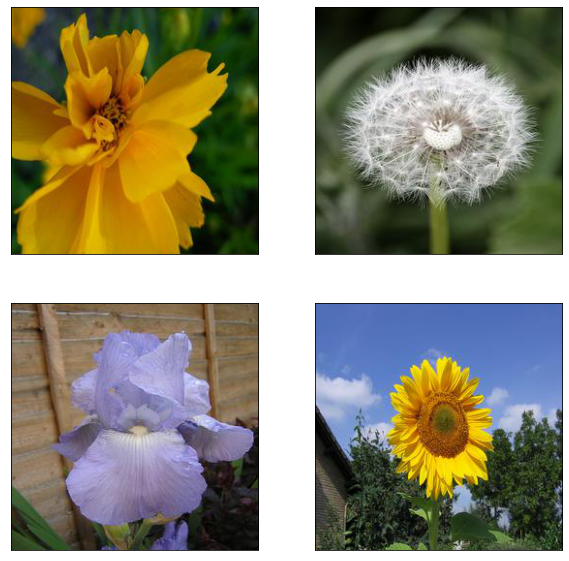

In [56]:
#Display second group of flowers
fig, ax = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(2):
    for j in range(2):
         ax[i,j].set_xticks([])
         ax[i,j].set_yticks([])
   
ax[0,0].imshow(images[7,10])
ax[0,1].imshow(images[9,10])
ax[1,0].imshow(images[10,10])
ax[1,1].imshow(images[13,10])

In [58]:
print('Flower names: ',flower_names[second_list])

Flower names:  ['coreopsis' 'dandelion' 'iris' 'sunflower']


In [62]:
feature_layers = [
    Conv2D(32, (3, 3), strides=(2,2), padding='same', input_shape=x_train.shape[1:]),
    Activation('relu'),
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(4, 4)),
    Dropout(0.25),
]


In [63]:
classification_layers = [
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.25),
    Dense(num_classes),
    Activation('softmax')
]

In [64]:
model4 = Sequential(feature_layers + classification_layers)
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 activation_34 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 activation_35 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_17 (Dropout)        (None, 31, 31, 32)        0         
                                                      

In [65]:

filepath='model_chkpnt5'
model_checkpoint = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [66]:
#Set datetime now function
now = datetime.datetime.now


In [67]:
#Compile and fit model with first set of data
t = now()

opt4 = keras.optimizers.Adam(learning_rate=0.001)
model4.compile(loss='categorical_crossentropy', optimizer=opt4, metrics=['accuracy'])
   
history=model4.fit(x_train, y_train, batch_size=batch_size, epochs=15, validation_data=(x_test, y_test), 
                     callbacks= model_checkpoint, shuffle=True)

print('Training time: %s' % (now() - t))

Epoch 1/15
9/9 [==============================] - 14s 1s/step - loss: 2.5665 - accuracy: 0.3036 - val_loss: 1.2817 - val_accuracy: 0.4333
Epoch 2/15
9/9 [==============================] - 10s 1s/step - loss: 1.2288 - accuracy: 0.4571 - val_loss: 1.1222 - val_accuracy: 0.5500
Epoch 3/15
9/9 [==============================] - 8s 966ms/step - loss: 0.9708 - accuracy: 0.6357 - val_loss: 0.9888 - val_accuracy: 0.6917
Epoch 4/15
9/9 [==============================] - 8s 855ms/step - loss: 0.7219 - accuracy: 0.7250 - val_loss: 0.8065 - val_accuracy: 0.6833
Epoch 5/15
9/9 [==============================] - 8s 934ms/step - loss: 0.4575 - accuracy: 0.8536 - val_loss: 0.6686 - val_accuracy: 0.8417
Epoch 6/15
9/9 [==============================] - 7s 849ms/step - loss: 0.2760 - accuracy: 0.9071 - val_loss: 0.6506 - val_accuracy: 0.7833
Epoch 7/15
9/9 [==============================] - 9s 1s/step - loss: 0.1601 - accuracy: 0.9536 - val_loss: 0.6387 - val_accuracy: 0.8167
Epoch 8/15
9/9 [===========

In [68]:
loss2=[]
accur2=[]
model4.load_weights(filepath)
score = model4.evaluate(x_test, y_test)
loss2.append(score[0])
accur2.append(score[1])
print('Loss: ',score[0])
print('Accuracy: ',score[1])

4/4 [==============================] - 1s 103ms/step - loss: 0.6686 - accuracy: 0.8417
Loss:  0.6685636639595032
Accuracy:  0.8416666388511658


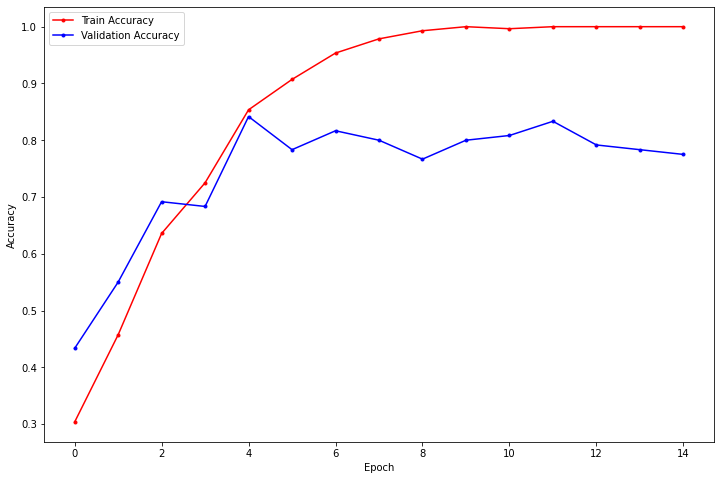

In [73]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(history.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(history.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()


In [74]:
#Freeze the feature layers

for layer in feature_layers:
    layer.trainable = False

In [78]:
#Display new model summary with frozen layers
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 activation_34 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 activation_35 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_17 (Dropout)        (None, 31, 31, 32)        0         
                                                      

In [79]:
filepath='model_chkpnt6'
model_checkpoint = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [80]:
#Compile and fit model with second set of data using frozen layers 

t = now()

opt4 = keras.optimizers.Adam(learning_rate=0.001)
model4.compile(loss='categorical_crossentropy', optimizer=opt4, metrics=['accuracy'])
   
history2=model4.fit(x_train2, y_train2, batch_size=batch_size, epochs=15, validation_data=(x_test2, y_test2), 
           callbacks=model_checkpoint, shuffle=True)

print('Training time: %s' % (now() - t))

Epoch 1/15
9/9 [==============================] - 22s 2s/step - loss: 2.0053 - accuracy: 0.3536 - val_loss: 1.1053 - val_accuracy: 0.5417
Epoch 2/15
9/9 [==============================] - 6s 716ms/step - loss: 0.7915 - accuracy: 0.7000 - val_loss: 0.8188 - val_accuracy: 0.6417
Epoch 3/15
9/9 [==============================] - 4s 464ms/step - loss: 0.5317 - accuracy: 0.8286 - val_loss: 0.7119 - val_accuracy: 0.7500
Epoch 4/15
9/9 [==============================] - 4s 477ms/step - loss: 0.3562 - accuracy: 0.8964 - val_loss: 0.6326 - val_accuracy: 0.7750
Epoch 5/15
9/9 [==============================] - 3s 380ms/step - loss: 0.2597 - accuracy: 0.9321 - val_loss: 0.6410 - val_accuracy: 0.7667
Epoch 6/15
9/9 [==============================] - 4s 520ms/step - loss: 0.1910 - accuracy: 0.9500 - val_loss: 0.5760 - val_accuracy: 0.7833
Epoch 7/15
9/9 [==============================] - 5s 563ms/step - loss: 0.1450 - accuracy: 0.9786 - val_loss: 0.5871 - val_accuracy: 0.7917
Epoch 8/15
9/9 [======

In [81]:
model4.load_weights(filepath)
score = model4.evaluate(x_test2, y_test2)
loss2.append(score[0])
accur2.append(score[1])
print('Loss: ',score[0])
print('Accuracy: ',score[1])

4/4 [==============================] - 2s 104ms/step - loss: 0.5871 - accuracy: 0.7917
Loss:  0.5870763063430786
Accuracy:  0.7916666865348816


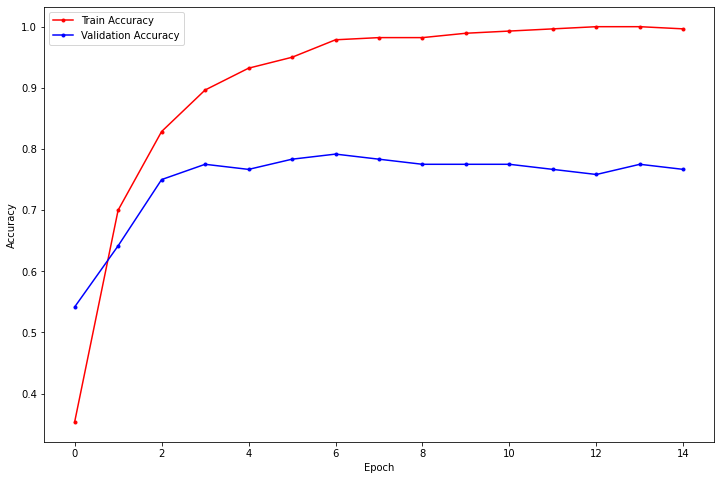

In [82]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(history2.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(history2.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()

In [86]:
mod=['First','Second']
results=pd.DataFrame(mod)
results.columns=['Model']
results['Val Loss']=loss2
results['Val Accuracy']=accur2
results

,Model,Val Loss,Val Accuracy
0,First,0.668564,0.841667
1,Second,0.587076,0.791667
